## Distribuição Normal

A distribuição normal (ou Guassiana) modela uma grande quantidade de variáveis observadas na natureza, como a estatura ou peso de uma população.

Também sob certas condições, algumas distribuições se comportam como normais, isto é conhecido como o **teorema do limite central**.

É possível ajustar uma distribuição de Poisson a uma normal quando $\lambda$ é um valor de grande magnitude.

Também é possível ajustar uma binomial a uma distribuição normal fazendo-se uma normalização dos dados. Para isso, propõe-se como exemplo agregar o argumento ```fit=stats.norm``` à construção do gráfico.

### Exemplo (1)

Para a definição de uma distribuição normal, é necessário estabelecer uma média e um desvio padrão, como as características de uma certa amostra. 

Imaginemos um exemplo em que temos uma população de pessoas cuja altura segue uma distribuição normal, com $\mu = 1.67 $ m e $\sigma = 0.15 $ m

A seguir, vamos usar um conjunto de amostras que vêm de uma distribuição normal, chamando à função ```normal``` do numpy com os parâmetros propostos.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

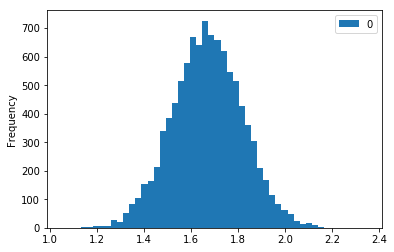

In [2]:
pd.DataFrame(np.random.normal(1.67, 0.15, 10000)).plot.hist(bins=50)

### Exemplo (2)

Da mesma forma, imaginemos um exemplo em que temos uma população de ursos cujo peso segue uma distribuição normal, com $\mu = 342,73 $ kg e $\sigma = 45,78 $ kg

Também vamos usar um conjunto de amostras que vêm de uma distribuição normal, chamando à função ```normal``` do numpy com os parâmetros propostos.

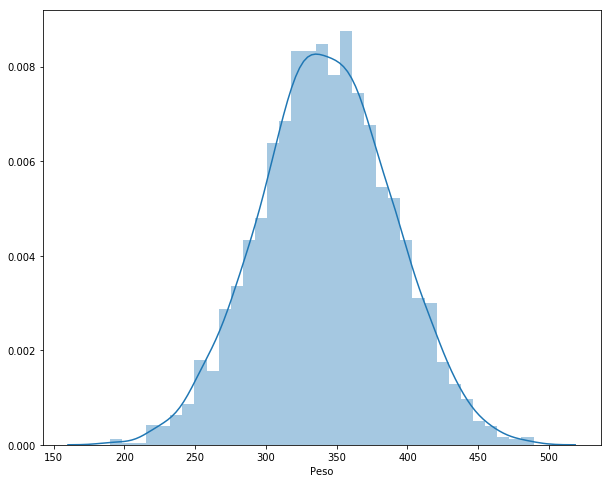

In [3]:
# definimos a média
media = 342.73

# definimos o desvio padrão
desvio_padrão = 45.78

# quantidade de amostras na população
n_amostras = 3000

# chamamos à função normal
samples_normal = np.random.normal(loc = media, 
                                  scale = desvio_padrão, 
                                  size = n_amostras)

# construímos o gráfico
eixo_x = 'Peso'
plt.figure(figsize=(10,8))
sns.distplot(samples_normal, axlabel = eixo_x)
plt.show()


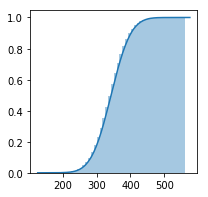

In [12]:
plt.figure(figsize=(3,3))
sns.distplot(samples_normal,
              hist_kws=dict(cumulative=True),
              kde_kws=dict(cumulative=True))

plt.show()

## Distribuição normal converge com o aumento do tamanho da amostra

Utilizando os mesmos valoes para a média (342.73) e o desvio padrão (45.78), vamos variar o tamanho da amostra em 10, 100, 1000, 10000 e 100000 observações, para observar o comportamento da distribuição sendo normalizado, seguido do gráfico da função densidade acumulada.

n: 10


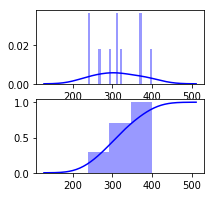

n: 100


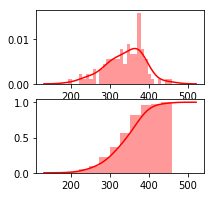

n: 1000


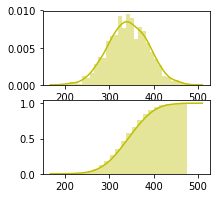

n: 10000


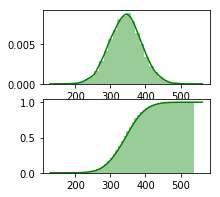

n: 100000


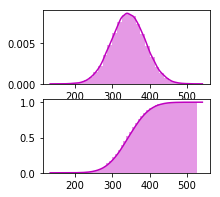

In [13]:
for n, c in [[10,'b'],[100,'r'],[1000,'y'],[10000,'g'],[100000,'m']]:
    print('n:',n)
    
    fig, ax = plt.subplots(2,1,figsize=(3, 3))

    samples_normal = np.random.normal(loc = media,
                                      scale = desvio_padrão,
                                      size = n)
    sns.distplot(samples_normal,
                 axlabel = eixo_x,
                 ax=ax[0],
                 color=c, 
                 bins=30)
    
    sns.distplot(samples_normal,
                 hist_kws=dict(cumulative=True),
                 kde_kws=dict(cumulative=True),
                 ax=ax[1], color=c)
    
    plt.show()

### Distribuição Normal Padrão
Uma forma mais fácil de trabalhar com uma distribuição que segue uma normal é tornando-a uma **normal padrão**, e fazemos isso com uma operação bastante simples, basicamente dividindo todos os valores pela média da amostra e dividindo esse resultado pelo desvio padrão da amostra.

Isso faz com que a média seja centrada no zero e o desvio padrão seja o valor 1, e isso vai simplificar muito as contas de agora em diante.

A escala horizontal do gráfico da distribuição normal padrão corresponde ao **Z-Score**, que é uma medida de posição que indica o número de desvios padrão em que um valor se encontra a partir da média. Podemos transformar um valor x em **Z-Score** subtraindo o valor meedio µ e em seguida dividindo-se pelo desvio padrão $\sigma$.

$Z \sim \dfrac{x - \mu} {\sigma^{2}\,} $


**Propriedades da distribuição normal padrão**
- A área acumulada é próxima de 0 para z-scores próximos a z=-3,49.
- A área acumulada aumenta conforme os z-scores aumentam.
- A área acumulada para z=0 é 0,5000.
- A área acumulada é próxima a 1 para z-scores próximos a z=3,49.

In [14]:
# vamos trabalhar com a mesma média e o mesmo desvio padrão (samples_normal.std = 45.71075907280459)
media = 342.73

new_samples_normal = []

samples_normal_std = samples_normal.std()
for row in samples_normal:
    new_value = (row-media)/samples_normal_std
    new_samples_normal.append(new_value)

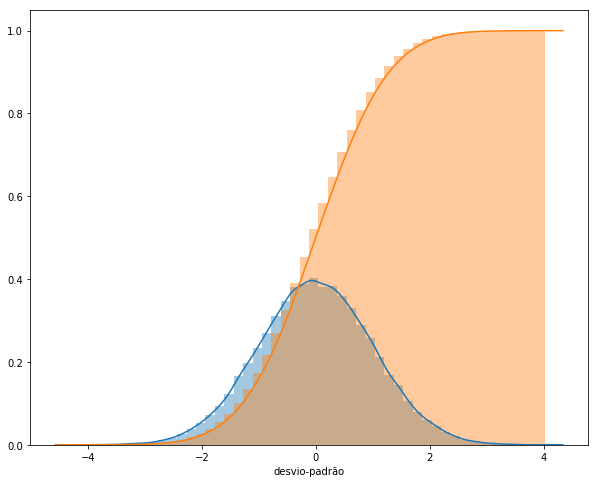

In [15]:
# construímos o gráfico
eixo_x = 'Peso'
plt.figure(figsize=(10,8))
sns.distplot(new_samples_normal, axlabel = 'desvio-padrão')
sns.distplot(new_samples_normal,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

### Z-score

<br>
<img src="img/normal3.png" width='500'>
<br>

Na estatística, o escore padrão **z-score** é o número fracionário assinado de desvios padrão pelo qual o valor de uma observação ou ponto de dados está acima do valor médio do que está sendo observado ou medido. Valores observados acima da média têm escores padrões positivos, enquanto valores abaixo da média têm escores padrão negativos.

É calculado subtraindo a média populacional de uma pontuação bruta individual e dividindo a diferença pelo desvio padrão da população. É uma quantidade adimensional. Esse processo de conversão é chamado de padronização ou normalização (no entanto, "normalização" pode se referir a muitos tipos de proporções; consulte a normalização para saber mais).

Os escores padrão também são chamados de valores z, escores z, escores normais e variáveis padronizadas. Eles são usados com mais frequência para comparar uma observação a um desvio teórico, como um desvio normal padrão.

A computação de um escore z requer o conhecimento da média e do desvio padrão da população completa à qual um ponto de dados pertence; se alguém tiver apenas uma amostra de observações da população, então o cálculo análogo com média da amostra e desvio padrão da amostra produz a estatística-t.

## Cálculo das probabilidades para os desvios-padrão da distribuição normal:

In [16]:
# Aplicando Scipy.Stats para uma normal com média 0 e desvio-padrão 1

media = 0
desvio_padrao = 1

import scipy.stats
scipy.stats.norm(0, 1)

In [17]:
# Probabilidade do intervalo de -1 desvio-padrão até 1 desvio-padrão
2 * (scipy.stats.norm(media, desvio_padrao).cdf(1) - scipy.stats.norm(media, desvio_padrao).cdf(0))

0.6826894921370859

In [18]:
# Probabilidade do intervalo de -2 desvios-padrão até 2 desvios-padrão
2 * (scipy.stats.norm(media, desvio_padrao).cdf(2) - scipy.stats.norm(media, desvio_padrao).cdf(0))

0.9544997361036416

In [19]:
# Probabilidade do intervalo de -3 desvios-padrão até 3 desvios-padrão
2 * (scipy.stats.norm(media, desvio_padrao).cdf(3) - scipy.stats.norm(media, desvio_padrao).cdf(0))

0.9973002039367398

In [20]:
# Probabilidade do intervalo de -4 desvios-padrão até 4 desvios-padrão
2 * (scipy.stats.norm(media, desvio_padrao).cdf(4) - scipy.stats.norm(media, desvio_padrao).cdf(0))

0.9999366575163338